This notebook demonstrates how to build, train, and evaluate a simple Autoencoder on the MNIST dataset of handwritten digits. The Autoencoder compresses images into a 2-dimensional bottleneck representation and then reconstructs them back to their original form.

Key steps in this notebook:

* Define an Autoencoder model with an encoder (reduces input size to a 2D latent space) and a decoder (reconstructs the image).

* Train the model using mean squared error (MSE) as the loss function and the Adam optimizer.

* Visualize the latent space by plotting the 2D representations of all digits, colored by their labels.

* Compare original images with their reconstructions to evaluate model performance.

At the end of the notebook, you will also find short reflection questions to think about the role of activation functions, bottleneck size, and loss reduction during training.


In [1]:
# Install libraries (if needed)
!pip install torch torchvision matplotlib

# Import modules
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

1. Define the bottleneck size (currently set to 2).
2. Use a suitable activation function for the output layer to ensure pixel values are in the correct range.

In [2]:
# Define an Autoencoder class by extending nn.Module
class Autoencoder(nn.Module):
    def __init__(self):
        # Initialize the parent class (nn.Module)
        super().__init__()

        # -------------------------
        # Encoder: compresses input
        # -------------------------
        self.encoder = nn.Sequential(
            nn.Flatten(),               # Flatten 28x28 image → vector of size 784
            nn.Linear(28*28, 128),      # Fully connected layer: 784 → 128 features
            nn.ReLU(),                  # Non-linear activation (introduces non-linearity)
            nn.Linear(128, 2)           # Bottleneck layer: compress to 2 dimensions
        )

        # -------------------------
        # Decoder: reconstructs input
        # -------------------------
        self.decoder = nn.Sequential(
            nn.Linear(2, 128),          # Expand back from 2 → 128 features
            nn.ReLU(),                  # Non-linear activation
            nn.Linear(128, 28*28),      # Map 128 features back to 784 pixels
            nn.Sigmoid(),               # Ensure outputs are between 0–1 (pixel range)
            nn.Unflatten(1, (1, 28, 28))# Reshape vector back into image: (1, 28, 28)
        )

    # Forward pass: how data flows through the network
    def forward(self, x):
        z = self.encoder(x)      # Encode input into 2D latent representation
        x_hat = self.decoder(z)  # Decode latent representation back to image
        return x_hat, z          # Return reconstructed image and latent vector

In [3]:
# Load MNIST dataset
transform = transforms.ToTensor()
mnist = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)
dataloader = DataLoader(mnist, batch_size=256, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 37.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.05MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.61MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.3MB/s]


3. Complete the setup for training the Autoencoder by defining:
* the loss function suitable for image reconstruction.
* The optimizer to update model weights (options: optim.SGD, optim.Adam, optim.RMSprop) with a learning rate of 1e-3.

In [4]:
# Model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [5]:
# Training loop for the Autoencoder
# Note: this is a simple demonstration and not a fully optimized setup

# We will train for 50 epochs (passes through the entire dataset)
for epoch in range(50):
    # Initialize a variable to accumulate the total loss for this epoch
    total_loss = 0

    # Loop through the dataset in batches
    # 'images' contains the input batch, '_' ignores the labels (not needed for autoencoders)
    for images, _ in dataloader:

        # Forward pass: pass images through the model
        # x_hat = reconstructed images, z = latent representation (ignored here)
        x_hat, _ = model(images)

        # Compute the loss: how different are reconstructed images from the originals?
        # Using Mean Squared Error (MSE) between x_hat and images
        loss = criterion(x_hat, images)

        # Reset gradients before backpropagation
        # Otherwise, PyTorch would accumulate gradients from previous steps
        optimizer.zero_grad()

        # Backward pass: compute gradients of loss w.r.t. all trainable parameters
        loss.backward()

        # Update parameters using the chosen optimizer (Adam in this case)
        optimizer.step()

        # Accumulate the loss for monitoring
        total_loss += loss.item()

    # Print the total loss after one epoch (all batches)
    # This gives an indication of how well the model is learning
    print(f"Epoch {epoch+1}, Loss: {total_loss:.2f}")


Epoch 1, Loss: 16.08
Epoch 2, Loss: 12.68
Epoch 3, Loss: 12.16
Epoch 4, Loss: 11.75
Epoch 5, Loss: 11.48
Epoch 6, Loss: 11.32
Epoch 7, Loss: 11.20
Epoch 8, Loss: 11.10
Epoch 9, Loss: 11.01
Epoch 10, Loss: 10.94
Epoch 11, Loss: 10.86
Epoch 12, Loss: 10.79
Epoch 13, Loss: 10.72
Epoch 14, Loss: 10.65
Epoch 15, Loss: 10.59
Epoch 16, Loss: 10.54
Epoch 17, Loss: 10.48
Epoch 18, Loss: 10.42
Epoch 19, Loss: 10.37
Epoch 20, Loss: 10.33
Epoch 21, Loss: 10.28
Epoch 22, Loss: 10.24
Epoch 23, Loss: 10.20
Epoch 24, Loss: 10.17
Epoch 25, Loss: 10.13
Epoch 26, Loss: 10.09
Epoch 27, Loss: 10.06
Epoch 28, Loss: 10.03
Epoch 29, Loss: 10.00
Epoch 30, Loss: 9.98
Epoch 31, Loss: 9.95
Epoch 32, Loss: 9.93
Epoch 33, Loss: 9.90
Epoch 34, Loss: 9.88
Epoch 35, Loss: 9.86
Epoch 36, Loss: 9.84
Epoch 37, Loss: 9.82
Epoch 38, Loss: 9.80
Epoch 39, Loss: 9.78
Epoch 40, Loss: 9.76
Epoch 41, Loss: 9.75
Epoch 42, Loss: 9.73
Epoch 43, Loss: 9.72
Epoch 44, Loss: 9.69
Epoch 45, Loss: 9.68
Epoch 46, Loss: 9.67
Epoch 47, Loss

Visualization of the latent space learned by the Autoencoder:

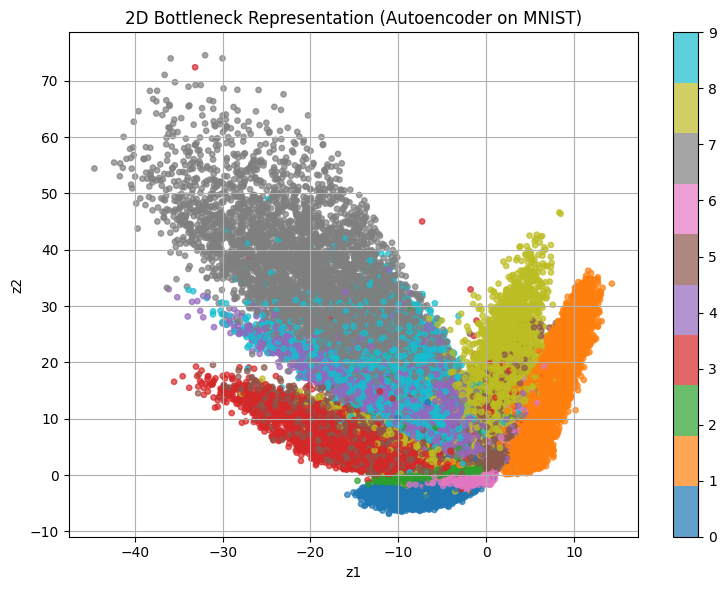

In [6]:
# Plot latent space
model.eval()
all_z = []
all_labels = []
with torch.no_grad():
    for images, labels in DataLoader(mnist, batch_size=512):
        _, z = model(images)
        all_z.append(z)
        all_labels.append(labels)
z_all = torch.cat(all_z).numpy()
labels_all = torch.cat(all_labels).numpy()


plt.figure(figsize=(8, 6))
scatter = plt.scatter(z_all[:, 0], z_all[:, 1], c=labels_all, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, ticks=range(10))
plt.title("2D Bottleneck Representation (Autoencoder on MNIST)")
plt.xlabel("z1")
plt.ylabel("z2")
plt.grid(True)
plt.tight_layout()
plt.show()

10 original vs reconstructed images

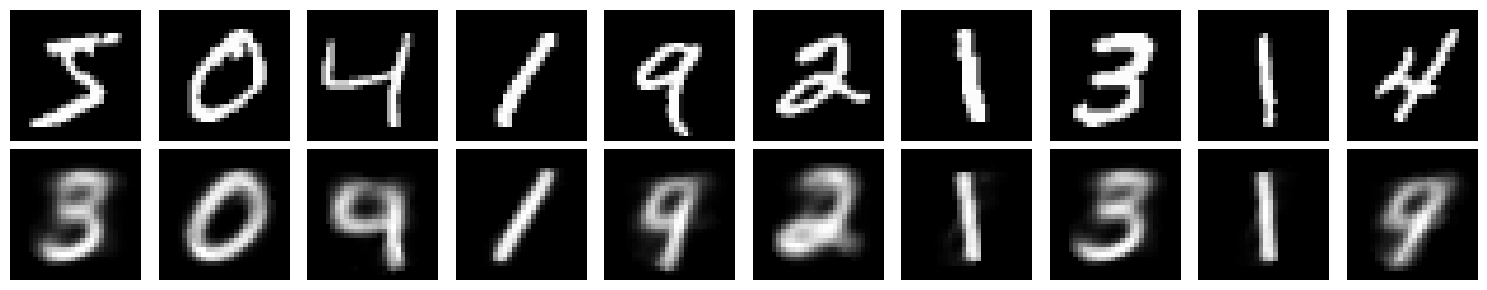

In [7]:
images, _ = next(iter(DataLoader(mnist, batch_size=10)))
with torch.no_grad():
    recon, _ = model(images)

fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    axes[0, i].imshow(images[i][0], cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(recon[i][0], cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_ylabel("Original", fontsize=12)
axes[1, 0].set_ylabel("Reconstructed", fontsize=12)
plt.tight_layout()
plt.show()